# 2018315006 정성엽

# 덱 q 상속
- 원형 덱으로 구현하는 것이 시간 복잡도 O(1)

## add_front, delete_rear(), get_rear()
- add_front와 delete_rear는 반시계 방향 회전
- front와 rear는 반대방향

In [2]:
MAX_QSIZE = 10   
class CircularQueue :
    def __# 덱 q 상속
- 원형 덱으로 구현하는 것이 시간 복잡도 O(1)

## add_front, delete_rear(), get_rear()
- add_front와 delete_rear는 반시계 방향 회전
- front와 rear는 반대방향init__( self ) :
        self.front = 0
        self.rear = 0
        self.items = [None] * MAX_QSIZE
    def isEmpty( self ) : return self.front == self.rear
    def isFull( self ) : return self.front == (self.rear+1)%MAX_QSIZE
    def clear( self ) : self.front = self.rear
    def enqueue( self, item ):
        if not self.isFull():         
            self.rear = (self.rear+1)% MAX_QSIZE
            self.items[self.rear] = item   
    def dequeue( self ):
        if not self.isEmpty():            
            self.front = (self.front+1)% MAX_QSIZE
            return self.items[self.front]       
    def peek( self ):
        if not self.isEmpty():
            return self.items[(self.front + 1) % MAX_QSIZE]
    def size( self ) :
        return (self.rear - self.front + MAX_QSIZE) % MAX_QSIZE
    def display( self ):
        out = []
        if self.front < self.rear :
            out = self.items[self.front+1:self.rear+1]
        else:
            out = self.items[self.front+1:MAX_QSIZE] \
                + self.items[0:self.rear+1]
        print("[f=%s,r=%d] ==> "%(self.front, self.rear), out)

In [3]:
def isValidPos(x, y) :
    if x < 0 or y < 0 or x >= MAZE_SIZE or y >= MAZE_SIZE :
        return False
    else :       # 덱 q 상속
- 원형 덱으로 구현하는 것이 시간 복잡도 O(1)

## add_front, delete_rear(), get_rear()
- add_front와 delete_rear는 반시계 방향 회전
- front와 rear는 반대방향
        return map[y][x] == '0' or map[y][x] == 'x'
def BFS() :   
    que = CircularQueue() # 스택이 아니라 큐
    que.enqueue((0,1))
    print('BFS: ')
    while not que.isEmpty(): 
        here = que.dequeue()
        print(here, end='->')
        x,y = here
        if (map[y][x] == 'x') : return True
        else :
            map[y][x] = '.'
            if isValidPos(x, y - 1) : que.enqueue((x, y - 1))  # 이웃위치 탐색순서 1
            if isValidPos(x, y + 1) : que.enqueue((x, y + 1))  # 이웃위치 탐색순서 2
            if isValidPos(x - 1, y) : que.enqueue((x - 1, y))  # 이웃위치 탐색순서 3
            if isValidPos(x + 1, y) : que.enqueue((x + 1, y))  # 이웃위치 탐색순서 4
    return False
map = [   [ '1', '1', '1', '1', '1', '1' ],
    [ 'e', '0', '1', '0', '0', '1' ],
    [ '1', '0', '0', '0', '1', '1' ],
    [ '1', '0', '1', '0', '1', '1' ],
    [ '1', '0', '1', '0', '0', 'x' ],
    [ '1', '1', '1', '1', '1', '1' ]]
MAZE_SIZE = 6
result = BFS()
if result : print(' --> 미로탐색 성공')
else : print(' --> 미로탐색 실패')

BFS: 
(0, 1)->(1, 1)->(1, 2)->(1, 3)->(2, 2)->(1, 4)->(3, 2)->(3, 1)->(3, 3)->(4, 1)->(3, 4)->(4, 4)->(5, 4)-> --> 미로탐색 성공


In [10]:
## 덱 q 상속 
# 원형 덱으로 구현하는 것이 시간 복잡도 O(1) 
### add_front(), delete_rear(), get_rear()
# add_front와 delete_rear는 --> 반시계 방향회전    
# front와 rear는 반대방향
class CircularDeque(CircularQueue) :          
    def __init__( self ) :                
        super().__init__()                #생성자는 상속되지 않으므로 정의해야~
    def addRear( self, item ): self.enqueue(item )
    def deleteFront( self ): return self.dequeue()
    def getFront( self ): return self.peek()
   
    def addFront( self, item ):         # 새로운 기능 전단 삽입
        if not self.isFull():
            self.items[self.front] = item        
            self.front = self.front - 1      # 반시계 방향 회전
            if self.front < 0 : self.front = MAX_QSIZE - 1
    def deleteRear( self ):      # 새로운 기능 후단 삽입
        if not self.isEmpty():
            item = self.items[self.rear];
            self.rear = self.rear - 1   # 반시계 방향 회전
            if self.rear < 0 : self.rear = MAX_QSIZE - 1
            return item    
    def getRear( self ): # 새로운 기능 후단 peek
        return self.items[self.rear]   
dq = CircularDeque()       

for i in range(9):        
    if i%2==0 : dq.addRear(i)  #짝수는 후단에 삽입
    else : dq.addFront(i)     # 홀수는 전단에 삽입
dq.display()        
for i in range(2): dq.deleteFront()  #인덱스 증가
dq.display() 
for i in range(3): dq.deleteRear()  #인덱스 감소
dq.display()
for i in range(9,14): dq.addFront(i)  #인덱스 감소
dq.display()

#                 7  8  9 10  1  2  3  4  5       front는 삽입하고 앞 인덱스 가리키고  rear는 삽입하고 해당 인덱스 가리킨다  
# [f=6,r=5] ==>  [7, 5, 3, 1, 0, 2, 4, 6, 8]  
#                 9 10  1  2  3  4  5    
# [f=8,r=5] ==>  [3, 1, 0, 2, 4, 6, 8]  
#                9  10  1  2    
# [f=8,r=2] ==>  [3, 1, 0, 2]  
#                 4   5    6   7  8  9  10  1  2   
# [f=3,r=2] ==>  [13, 12, 11, 10, 9, 3, 1, 0, 2]  

[f=6,r=5] ==>  [7, 5, 3, 1, 0, 2, 4, 6, 8]
[f=8,r=5] ==>  [3, 1, 0, 2, 4, 6, 8]
[f=8,r=2] ==>  [3, 1, 0, 2]
[f=3,r=2] ==>  [13, 12, 11, 10, 9, 3, 1, 0, 2]


# 우선순위 큐
- 정렬하지 않은 리스트 사용
- 단순화를 위해 데이터 자체가 우선순위를 나타낸다고 가정

In [13]:
class PriorityQueue :
    def __init__( self ):
        self.items = []
    def isEmpty( self ):  #공백상태 검사
        return len( self.items ) == 0
    def size( self ): return len(self.items)  #전체 항목개수
    def clear( self ): self.items = []  #초기화
    def enqueue( self, item ):
        self.items.append( item ) #리스트 맨뒤 삽입 O(1)
    def findMaxIndex( self ):# 최대 우선순위항목 인덱스 반환
        if self.isEmpty(): return None
        else:
            highest = 0  #0번을 최대값이라고 ..
            for i in range(1, self.size()) :
                if self.items[i] > self.items[highest] :
                    highest = i
            return highest
    def dequeue( self ):
        highest = self.findMaxIndex()  # 우선순위 가장 높은 항목
        if highest is not None :
            return self.items.pop(highest)  #리스트에서 꺼내서 반환
 
    def peek( self ):
        highest = findMaxIndex()
        if highest is not None :
            return self.items[highest]  #꺼내지 않고 반환
q = PriorityQueue()
q.enqueue( 34 )
q.enqueue( 18 )
q.enqueue( 27 )
q.enqueue( 45 )
q.enqueue( 15 )
print("PQueue:", q.items)
while not q.isEmpty() :
    print("Max Priority = ", q.dequeue() )

PQueue: [34, 18, 27, 45, 15]
Max Priority =  45
Max Priority =  34
Max Priority =  27
Max Priority =  18
Max Priority =  15


In [15]:
import math
(ox,oy) = (5, 4)
def dist(x,y) :
    (dx, dy) = (ox-x, oy-y)
    return math.sqrt(dx*dx + dy*dy)   # Eucledian Distance
def MySmartSearch() :  # 최소거리 전략 미로탐색
    q = PriorityQueue()
    q.enqueue((0,1,-dist(0,1)))
    print('PQueue: ')
    while not q.isEmpty(): 
        here = q.dequeue()
        print(here[0:2], end='->')
        x,y,_ = here
        if (map[y][x] == 'x') : return True
        else :
            map[y][x] = '.'
            if isValidPos(x, y - 1) : q.enqueue((x,y-1, -dist(x,y-1)))
            if isValidPos(x, y + 1) : q.enqueue((x,y+1, -dist(x,y+1)))
            if isValidPos(x - 1, y) : q.enqueue((x-1,y, -dist(x-1,y)))
            if isValidPos(x + 1, y) : q.enqueue((x+1,y, -dist(x+1,y)))
        print('우선순위큐: ', q.items)
    return False

In [16]:
map = [ [ '1', '1', '1', '1', '1', '1' ],
       [ 'e', '0', '0', '0', '0', '1' ],
       [ '1', '0', '1', '0', '1', '1' ],
       [ '1', '1', '1', '0', '0', 'x' ],
       [ '1', '1', '1', '0', '1', '1' ],
       [ '1', '1', '1', '1', '1', '1' ]]
MAZE_SIZE = 6
result = MySmartSearch()
if result : print(' --> 미로탐색 성공')
else : print(' --> 미로탐색 실패')

PQueue: 
(0, 1)->우선순위큐:  [(1, 1, -5.0)]
(1, 1)->우선순위큐:  [(1, 2, -4.47213595499958), (2, 1, -4.242640687119285)]
(2, 1)->우선순위큐:  [(1, 2, -4.47213595499958), (3, 1, -3.605551275463989)]
(3, 1)->우선순위큐:  [(1, 2, -4.47213595499958), (3, 2, -2.8284271247461903), (4, 1, -3.1622776601683795)]
(4, 1)->우선순위큐:  [(1, 2, -4.47213595499958), (3, 2, -2.8284271247461903)]
(3, 2)->우선순위큐:  [(1, 2, -4.47213595499958), (3, 3, -2.23606797749979)]
(3, 3)->우선순위큐:  [(1, 2, -4.47213595499958), (3, 4, -2.0), (4, 3, -1.4142135623730951)]
(4, 3)->우선순위큐:  [(1, 2, -4.47213595499958), (3, 4, -2.0), (5, 3, -1.0)]
(5, 3)-> --> 미로탐색 성공


# 항목이 (x,y,-d)의 튜플의 마지막 요소(2=-d) 이용해 우선순위항목 찾기
- d는 거리를 음수로 가까울수록 더 큼

## 단순연결리스트 응용: 연결된 스택
스택에서 top은 파이썬 리스트 가리켰으며, 삽입과 삭제는 리스트인 top의 후단을 통해~  
## 단순 연결 리스트의 연결된 구조에서 top은 헤드포인터를 사용,
## 공백상태는 top이 None으로 초기화

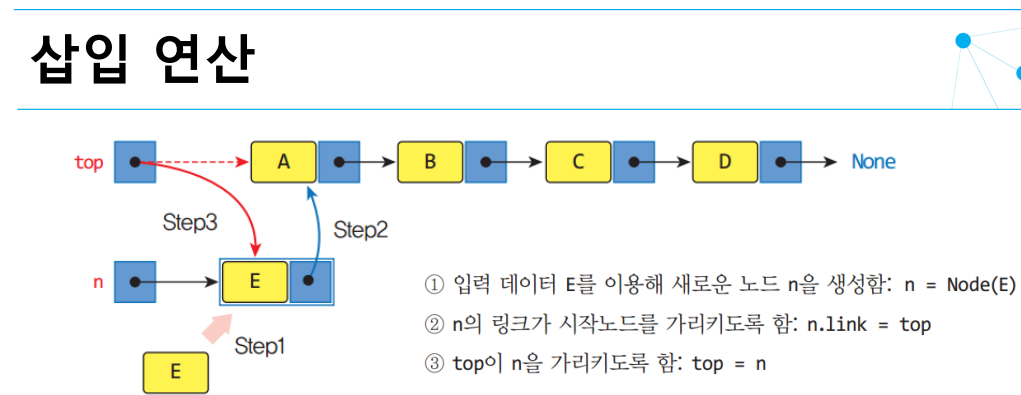

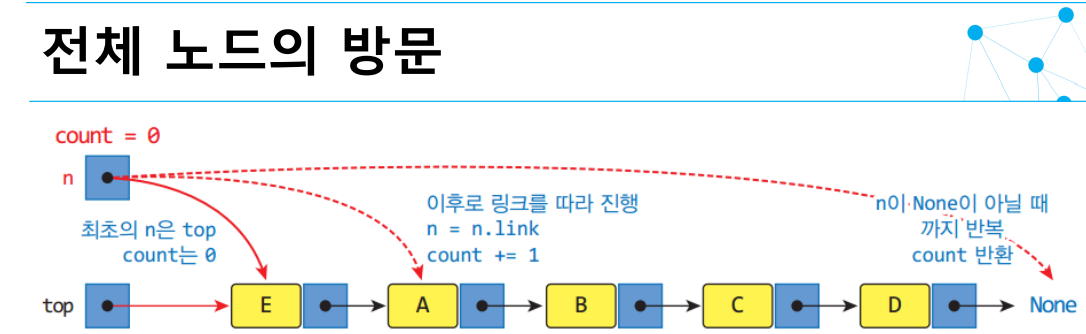

In [2]:
class Node:                 
    def __init__ (self, elem, link=None):
        self.data = elem        
        self.link = link       
class LinkedStack :
    def __init__( self ):  # top이 None으로 초기화
        self.top = None    
    def isEmpty( self ): return self.top == None   #공백상태는 top이 None으로
    def clear( self ): self.top = None   
    
    def push( self, item ):         # 삽입연산
        n = Node(item, self.top)
        self.top = n
    def pop( self ):           # 삭제 연산
        if not self.isEmpty():
            n = self.top
            self.top = n.link
            return n.data
    def peek( self ):
        if not self.isEmpty():
            return self.top.data
    def size( self ):
        node = self.top
        count = 0
        while not node == None :
            node = node.link
            count += 1
        return count
    def display( self, msg='LinkedStack:'): 
        print(msg, end='')
        node = self.top
        while not node == None :
            print(node.data, end=' ')
            node = node.link   
        print()
odd = LinkedStack()
even = LinkedStack()
for i in range(10): 
    if i%2 == 0 : even.push(i) 
    else : odd.push(i)  
even.display(' 스택 even push 5회: ')
odd.display (' 스택 odd  push 5회: ')
print(' 스택 even     peek: ', even.peek())
print(' 스택 odd      peek: ', odd.peek())
for _ in range(2) : even.pop()
for _ in range(3) : odd.pop()
even.display(' 스택 even  pop 2회: ')
odd.display (' 스택 odd   pop 3회: ')
print(' 스택 even     peek: ', even.peek())
print(' 스택 odd      peek: ', odd.peek())

 스택 even push 5회: 8 6 4 2 0 
 스택 odd  push 5회: 9 7 5 3 1 
 스택 even     peek:  8
 스택 odd      peek:  9
 스택 even  pop 2회: 4 2 0 
 스택 odd   pop 3회: 3 1 
 스택 even     peek:  4
 스택 odd      peek:  3


In [4]:
class LinkedList:
    def __init__( self ):
        self.head = None
    def isEmpty( self ): return self.head == None
    def clear( self ) : self.head = None  
    def size( self ):
        node = self.head
        count = 0
        while not node == None :
            node = node.link
            count += 1
        return count
    def display( self, msg='LinkedList:'): 
        print(msg, end='')       
        node = self.head 
        while not node == None :
            print(node.data,"->", end=' ')
            node = node.link  
        print("None")
    def getNode(self, pos) :    
        if pos < 0 : return None
        node = self.head;    
        while pos > 0 and node != None :
            node = node.link    
            pos -= 1       
        return node
    def getEntry(self, pos) :    
        node = self.getNode(pos)
        if node == None : return None
        else : return node.data   
    def replace(self, pos, elem) :  
        node = self.getNode(pos)
        if node != None: node.data = elem
    def find(self, data) :   
        node = self.head;
        while node is not None:
            if node.data == data : return node
            node = node.link
        return node
    def insert(self, pos, elem) :
        before = self.getNode(pos-1)    
        if before == None :    # 맨 앞에 삽입
            self.head = Node(elem, self.head)
        else :              
            node = Node(elem, before.link)  # 중간에 삽입 노드생성
            before.link = node
    def delete(self, pos) :
        before = self.getNode(pos-1)
        if before == None :         #시작노드 삭게
            if self.head is not None :
                self.head = self.head.link  #헤드를 다음으로 이동
        elif before.link != None :    #중간 노드 삭제
            before.link = before.link.link
s = LinkedList()
s.display('단순연결리스트로 구현한 리스트(초기상태):')
s.insert(0, 10);
s.insert(0, 20);
s.display("단순연결리스트로 구현한 리스트(삽입x2): ")
s.insert(1, 30)
s.display("단순연결리스트로 구현한 리스트(삽입x1): ")
s.insert(s.size(), 40);
s.display("단순연결리스트로 구현한 리스트(삽입x1): ")
s.insert(2, 50)
s.display("단순연결리스트로 구현한 리스트(삽입x1): ")
s.replace(2, 90)
s.display("단순연결리스트로 구현한 리스트(교체x1): ")
s.delete(2);
s.display("단순연결리스트로 구현한 리스트(삭제x1): ")
s.delete(s.size() - 1);
s.display("단순연결리스트로 구현한 리스트(삭제x1): ")
s.delete(0)
s.display("단순연결리스트로 구현한 리스트(삭제x1): ")
s.clear()
s.display("단순연결리스트로 구현한 리스트(정리후): ")

단순연결리스트로 구현한 리스트(초기상태):None
단순연결리스트로 구현한 리스트(삽입x2): 20 -> 10 -> None
단순연결리스트로 구현한 리스트(삽입x1): 20 -> 30 -> 10 -> None
단순연결리스트로 구현한 리스트(삽입x1): 20 -> 30 -> 10 -> 40 -> None
단순연결리스트로 구현한 리스트(삽입x1): 20 -> 30 -> 50 -> 10 -> 40 -> None
단순연결리스트로 구현한 리스트(교체x1): 20 -> 30 -> 90 -> 10 -> 40 -> None
단순연결리스트로 구현한 리스트(삭제x1): 20 -> 30 -> 10 -> 40 -> None
단순연결리스트로 구현한 리스트(삭제x1): 20 -> 30 -> 10 -> None
단순연결리스트로 구현한 리스트(삭제x1): 30 -> 10 -> None
단순연결리스트로 구현한 리스트(정리후): None


## 연결된 스택: 삽입, 삭제O(1), top에서만, 임의 위치에서 삽입, 삭제 -> 연결리스트
# 단순연결리스트 응용: 연결 리스트
노드 클래스: 연결된 스택에서와 동일
## 스택과 달리 리스트는 항목의 삽입이나 삭제가 시작 노드뿐만 아니라 임의의 위치에서도 가능

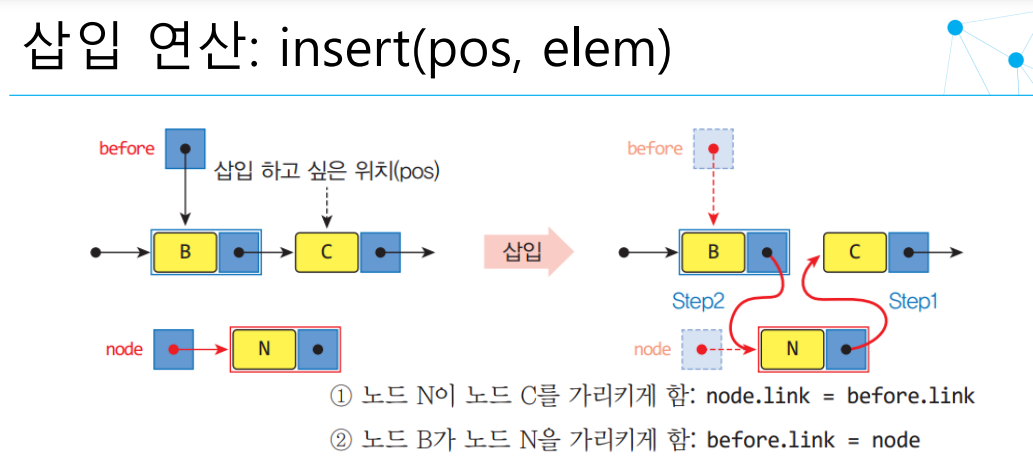

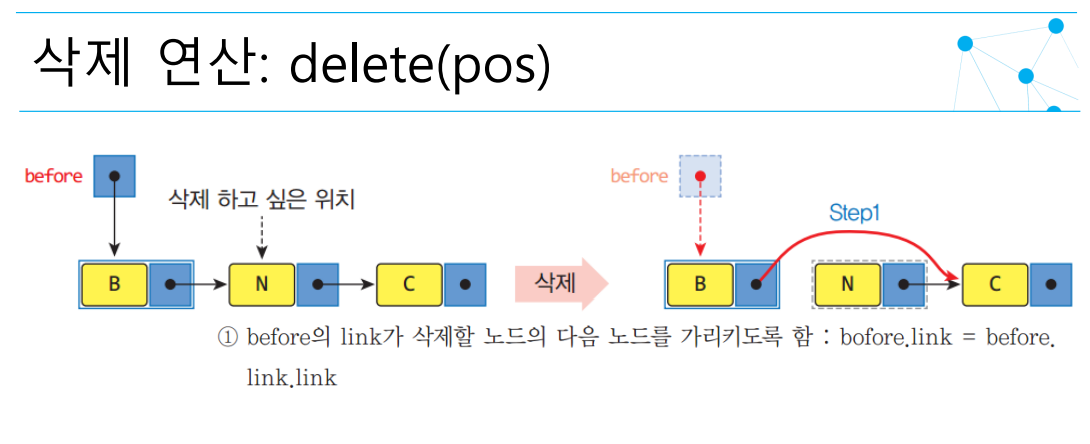

# 단순연결리스트로 구현한 큐

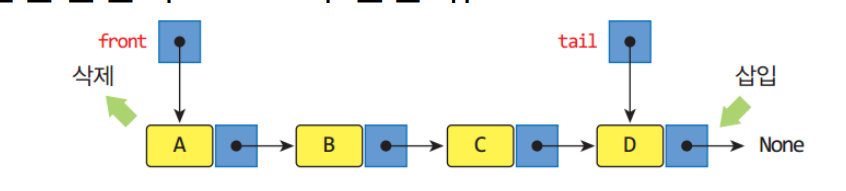

# 원형연결리스트로 구현한 큐

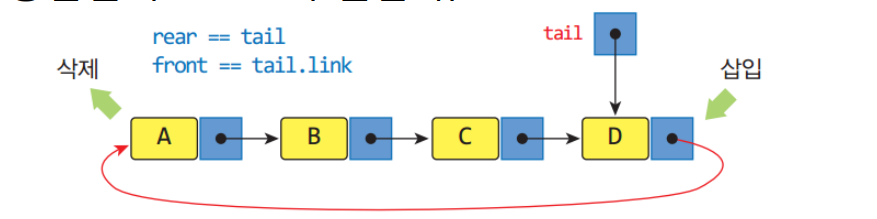

# tail만을 변수로 사용하여 tail의 다음 노드. 즉, tail.link가 front
tail을 사용하는 것이 rear와 front에 바로 접근할 수 있다는 점에서 훨씬 효율적

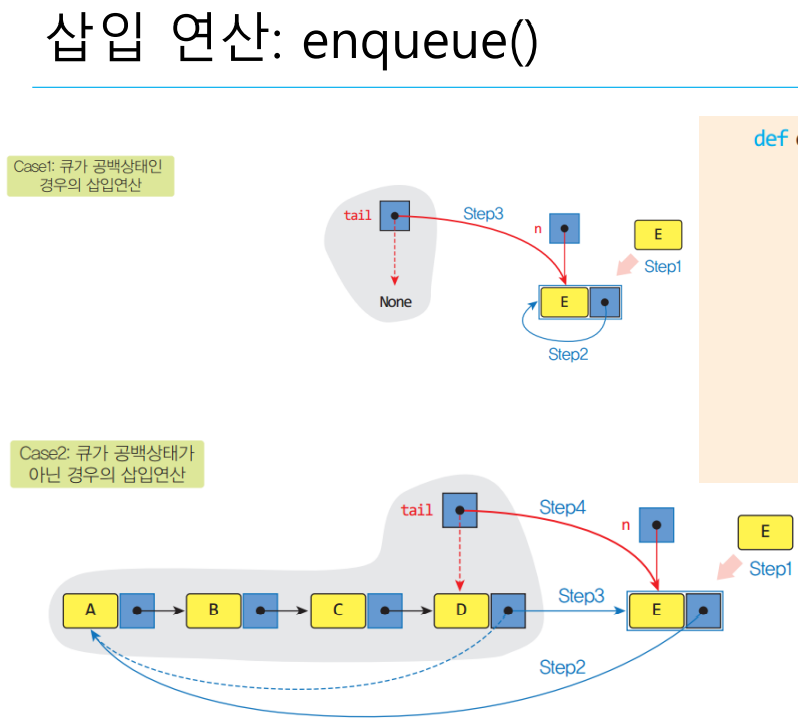

# 삭제연산: dequeue()

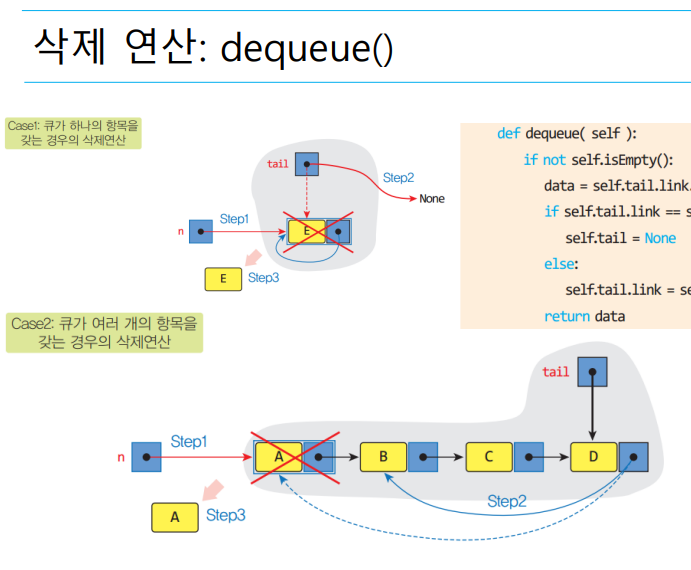

In [5]:
class CircularLinkedQueue:
    def __init__( self ):
        self.tail = None
    def isEmpty( self ): return self.tail == None 
    def clear( self ): self.tail = None
    def peek( self ):     
        if not self.isEmpty():  
            return self.tail.link.data
    def enqueue( self, item ):
        node = Node(item, None)
        if self.isEmpty() :
            node.link = node
            self.tail = node
        else :         
            node.link = self.tail.link
            self.tail.link = node  
            self.tail = node 
    def dequeue( self ):
        if not self.isEmpty():
            data = self.tail.link.data   
            if self.tail.link == self.tail :
                self.tail = None               
            else:
                self.tail.link = self.tail.link.link
            return data
    def size( self ):
        if self.isEmpty() : return 0
        else :          
            count = 1        
            node = self.tail.link  
            while not node == self.tail:
                node = node.link        
                count += 1       
            return count        
    def display( self, msg='CircularLinkedQueue:' ):
        print(msg, end='')
        if not self.isEmpty() :
            node = self.tail.link  
            while not node == self.tail :
                print(node.data, end=' ')
                node = node.link  
            print(node.data, end=' ')
        print()          
q = CircularLinkedQueue()
for i in range(8): q.enqueue(i)
q.display()         
for i in range(5): q.dequeue();
q.display()
for i in range(8,14): q.enqueue(i)
q.display()

CircularLinkedQueue:0 1 2 3 4 5 6 7 
CircularLinkedQueue:5 6 7 
CircularLinkedQueue:5 6 7 8 9 10 11 12 13 


## 원형 큐에서는 용량이 제한 (예: Maxsize=12), 연결된 큐에서는 용량제한 X, 시간복잡도O(1)
# 이중연결리스트의 응용: 연결된 덱

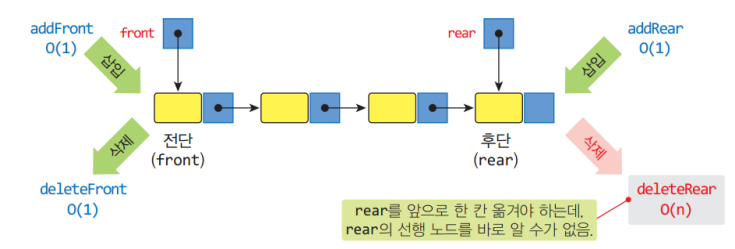

## deleteRear에서 문제점 발생: 후단을 삭제하고 나면 rear가 한칸 앞으로 움직여야하는데, 
## 단순연결리스트에서는 선행노드의 정보가 없다. 그래서 front부터 시작하여 선행노드를 찾아야 O(n)

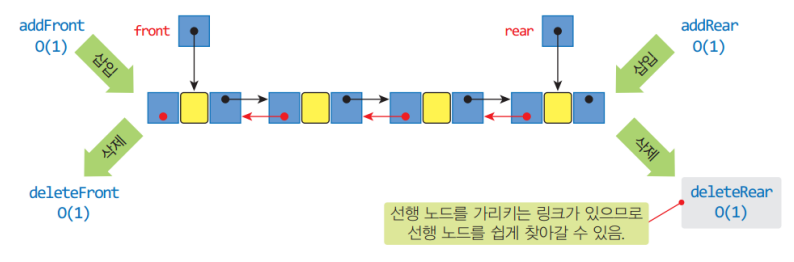

## addFront(), addRear()

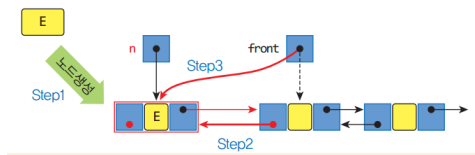

## deleteFront(), deleteRear()

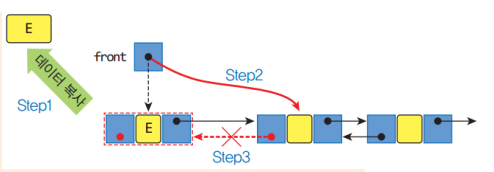

In [6]:
class DNode:
    def __init__ (self, elem, prev = None, next = None):
        self.data = elem 
        self.prev = prev
        self.next = next
class DoublyLinkedDeque:
    def __init__( self ):
        self.front = None
        self.rear = None
    def isEmpty( self ): return self.front == None
    def clear( self ): self.front = self.front = None
    def size( self ):
        node = self.front
        count = 0
        while not node == None :
            node = node.next
            count += 1
        return count
    def display( self, msg='LinkedDeque:'): 
        print(msg, end='')
        node = self.front
        while not node == None :
            print(node.data, end=' ')
            node = node.next    
        print()
    def addFront( self, item ):
        node = DNode(item, None, self.front)
        if( self.isEmpty()):
            self.front = self.rear = node
        else :
            self.front.prev = node
            self.front = node
    def addRear( self, item ):
        node = DNode(item, self.rear, None)
        if( self.isEmpty()):
            self.front = self.rear = node
        else :
            self.rear.next = node
            self.rear = node
    def deleteFront( self ):
        if not self.isEmpty():
            data = self.front.data
            self.front = self.front.next
            if self.front==None :
                self.rear = None
            else:
                self.front.prev = None
            return data
    def deleteRear( self ):
        if not self.isEmpty():
            data = self.rear.data
            self.rear = self.rear.prev
            if self.rear==None :
                self.front = None
            else:
                self.rear.next = None
            return data
dq = DoublyLinkedDeque()
for i in range(9):     
    if i%2==0 : dq.addRear(i)
    else : dq.addFront(i)  
dq.display()        
for i in range(2): dq.deleteFront()
for i in range(3): dq.deleteRear()
dq.display()
for i in range(9,14): dq.addFront(i)
dq.display()

LinkedDeque:7 5 3 1 0 2 4 6 8 
LinkedDeque:3 1 0 2 
LinkedDeque:13 12 11 10 9 3 1 0 2 
